In [2]:
%load_ext autoreload
%autoreload 2

In [81]:
import pyodbc
import pandas as pd  # sure takes a long time
import feature_util as util
import numpy as np
import umap
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import cluster_umap

In [10]:
dataset = util.extractDataset("B00")

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_01_04_cohort,BASE TABLE
1,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_04_04_Lab,BASE TABLE
2,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_05_04_Rad,BASE TABLE
3,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_06_Med_04_RxOutpat,BASE TABLE
4,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_06_Med_05_BCMA_Dispense...,BASE TABLE
5,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_06_Med_07_NonVAMed,BASE TABLE
6,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_06_Med_08_AllMed,BASE TABLE
7,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_08_Consult,BASE TABLE
8,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_12_ICD,BASE TABLE
9,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_14_Vital,BASE TABLE


dict_keys(['cohort', 'Lab', 'Rad', 'RxOutpat', 'DispensedDrug', 'NonVAMed', 'AllMed', 'Consult', 'ICD', 'Vital', 'HF', 'Note'])


In [11]:
icd_df = dataset["ICD"]

In [ ]:
display(icd_df)

In [37]:
edstart = util.extractFirstVisitIndexDatetime(dataset["cohort"])

In [38]:
filtered_icd_df = util.filterDFByTimes(icd_df, util.ICD_PATIENT_ID, "DiagDateTime", edstart)

In [ ]:
display(filtered_icd_df)

In [ ]:
icd_features = util.makeICDFeatureVector(filtered_icd_df)
display(icd_features)

In [ ]:
outpat_df = dataset["RxOutpat"]
filtered_outpat_df = util.filterDFByTimes(outpat_df, util.DRUG_PATIENT_ID, "DispensedDate", edstart)
outpat_features = util.makeRxOutpatFeatureVector(filtered_outpat_df)
display(outpat_features)

In [43]:
feature_vec = outpat_features.merge(icd_features, how="outer", left_on=util.ICD_PATIENT_ID, right_on=util.DRUG_PATIENT_ID)
feature_vec = feature_vec.fillna(0)

In [ ]:
display(feature_vec)

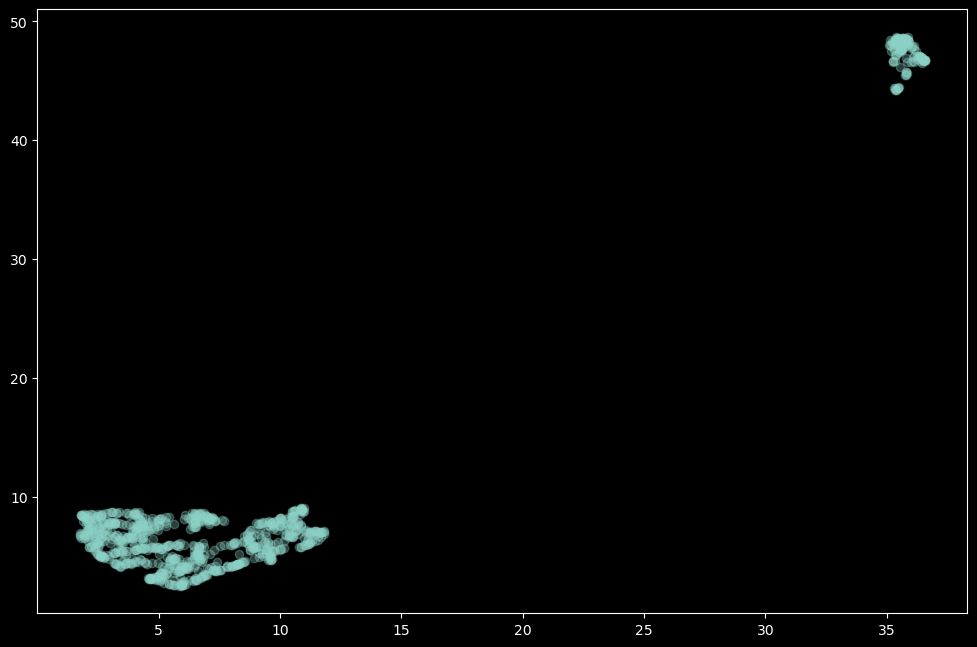

In [45]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(feature_vec.iloc[:,1:])
    
plt.style.use("dark_background")

fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.3)
plt.show()

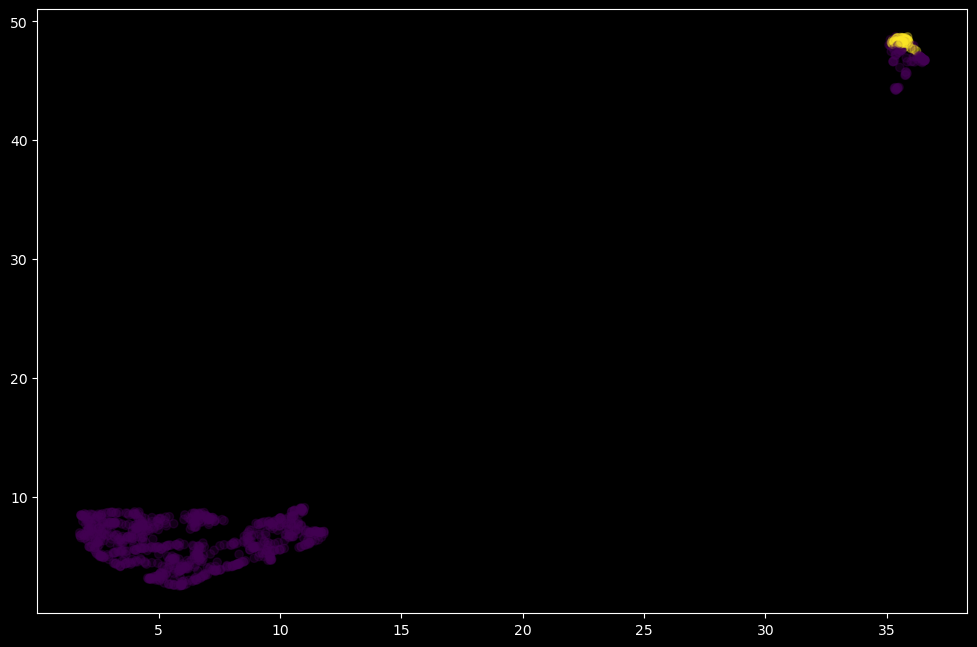

In [52]:
color_zeros = [ 0 if np.sum(feature_vec.iloc[i,1:]) > 0 else 1 for i in range(feature_vec.shape[0])]
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], c=color_zeros, alpha=0.3)
plt.show()

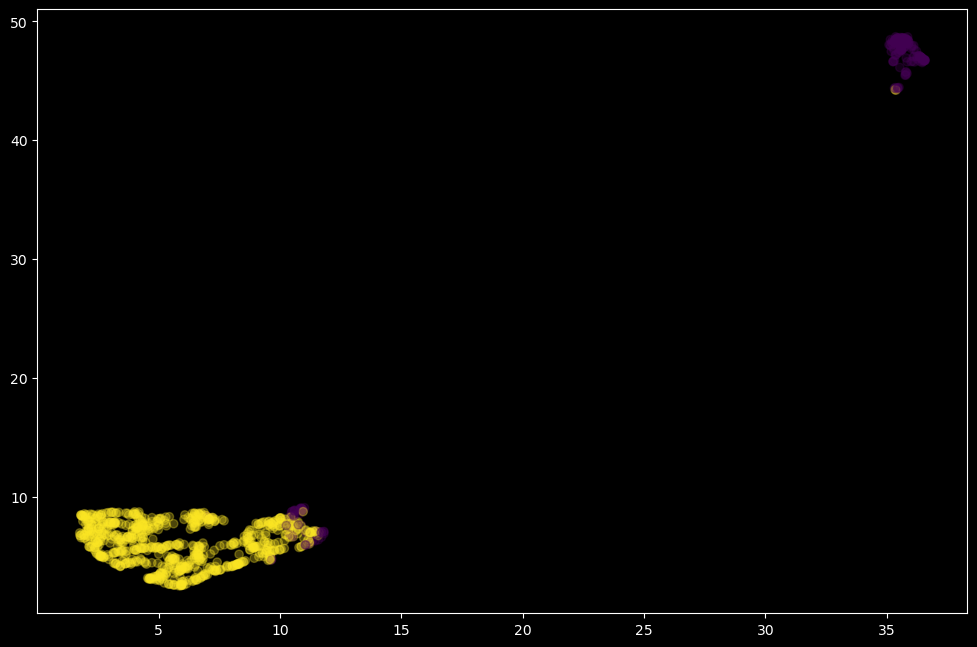

In [57]:
color_zeros = [ 1 if np.sum(feature_vec.iloc[i,1:7]) > 5 else 0 for i in range(feature_vec.shape[0])]
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], c=color_zeros, alpha=0.3)
plt.show()

In [ ]:
outpat_df = dataset["RxOutpat"]
filtered_outpat_df = util.filterDFByTimes(outpat_df, util.DRUG_PATIENT_ID, "DispensedDate", edstart)
outpat_features = util.makeRxOutpatTimeWindowVec(filtered_outpat_df, edstart)
display(outpat_features)

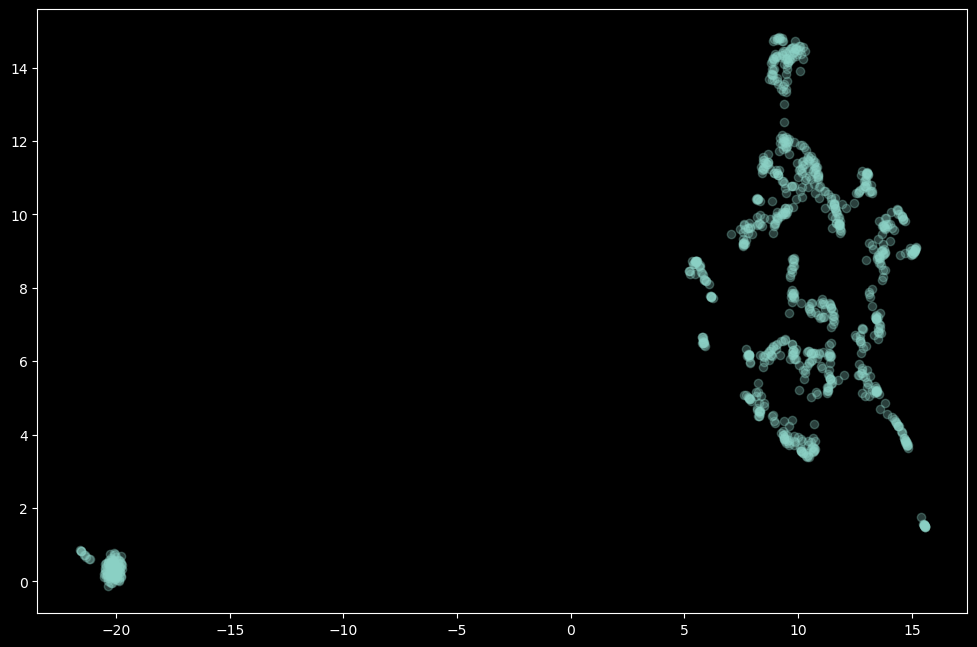

In [78]:
feature_vec3 = outpat_features.merge(icd_features, how="outer", left_on=util.ICD_PATIENT_ID, right_on=util.DRUG_PATIENT_ID)
feature_vec3 = feature_vec2.fillna(0)
feature_vec4 = sklearn.preprocessing.StandardScaler().fit_transform(feature_vec3.iloc[:,1:])


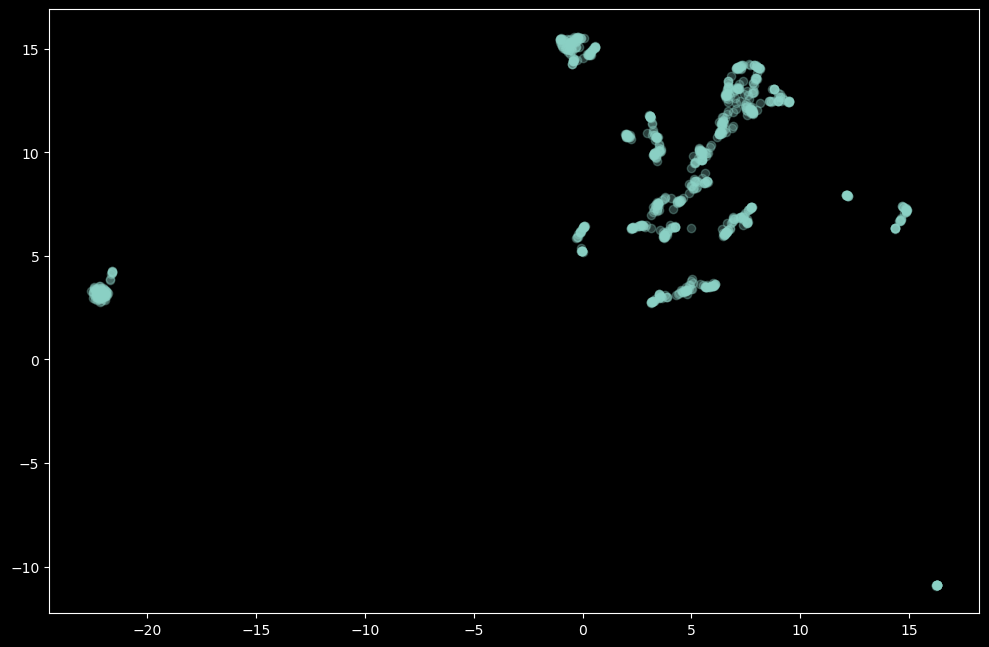

In [79]:

reducer4 = umap.UMAP(metric="correlation", min_dist=0)
embedding4 = reducer4.fit_transform(feature_vec4)
plt.style.use("dark_background")

fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding4[:, 0], embedding4[:, 1], alpha=0.3)
plt.show()

Cluster 1

Cluster 2

Cluster 3

Cluster 4

Cluster 5

Cluster 6

Cluster 7

Cluster 8

Cluster 9

Cluster 10



KMeans(n_clusters=10)

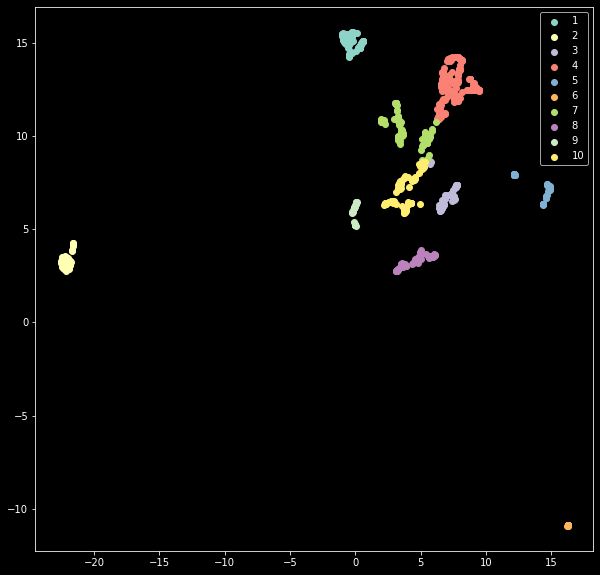

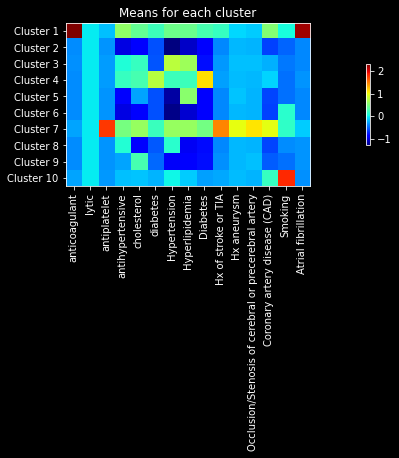

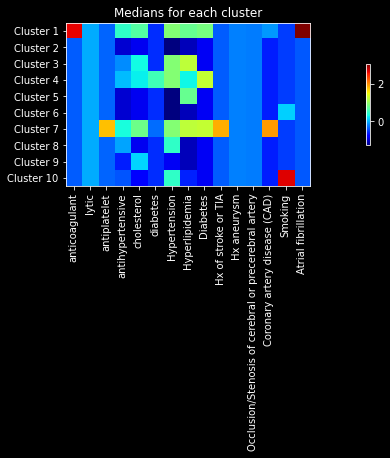

In [84]:
cluster_umap.run_clustering_on_umap(reducer4, 10, feature_vec3.iloc[:,1:], feature_vec3.columns[1:])

In [63]:
outpat_features.iloc[:,1:] /= 180

In [ ]:
display(outpat_features)

In [ ]:
icd_capped = icd_features.copy()
icd_capped.iloc[:,1:] = icd_capped.iloc[:,1:].clip(upper=5)
display(icd_capped)

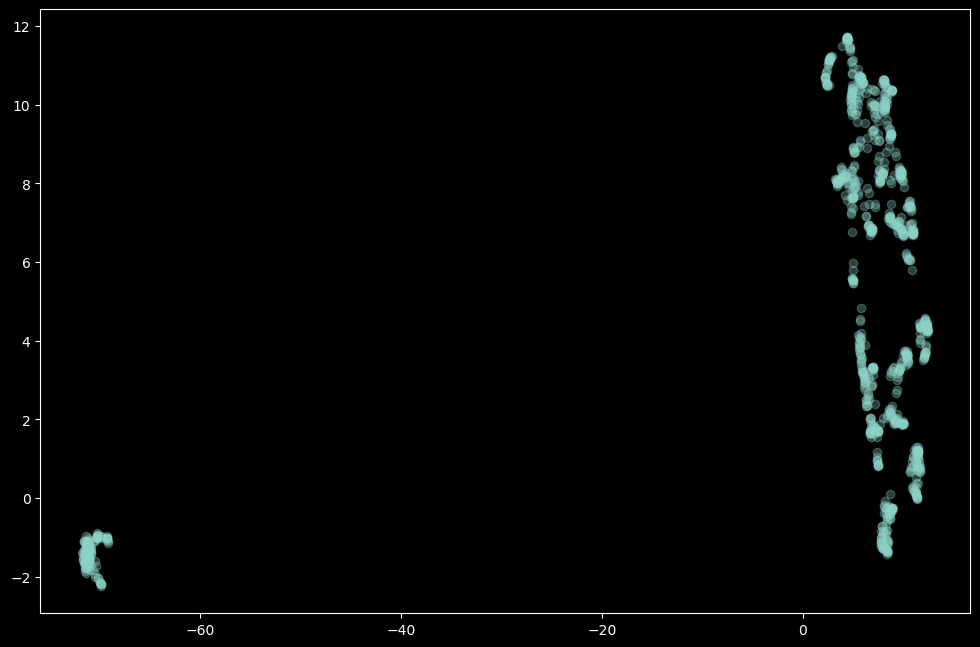

In [70]:
feature_vec2 = outpat_features.merge(icd_capped, how="outer", left_on=util.ICD_PATIENT_ID, right_on=util.DRUG_PATIENT_ID)
feature_vec2 = feature_vec2.fillna(0)
reducer2 = umap.UMAP(metric="correlation", min_dist=0)
embedding2 = reducer2.fit_transform(feature_vec2.iloc[:,1:])
    
plt.style.use("dark_background")

fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding2[:, 0], embedding2[:, 1], alpha=0.3)
plt.show()

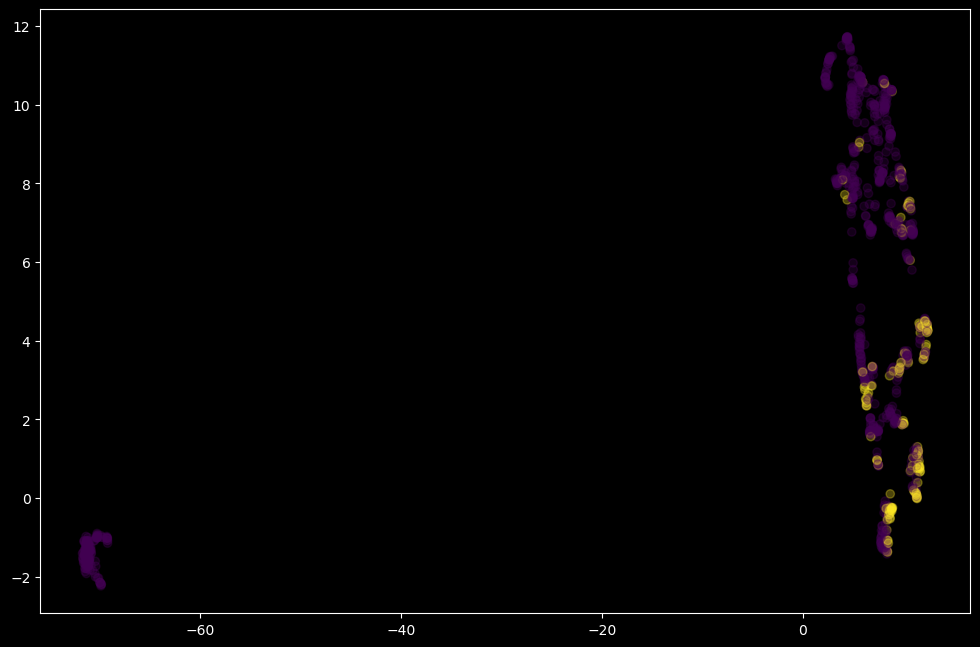

In [71]:
color_zeros = [ 1 if np.sum(feature_vec2.iloc[i,1:7]) > 5 else 0 for i in range(feature_vec.shape[0])]
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding2[:, 0], embedding2[:, 1], c=color_zeros, alpha=0.3)
plt.show()

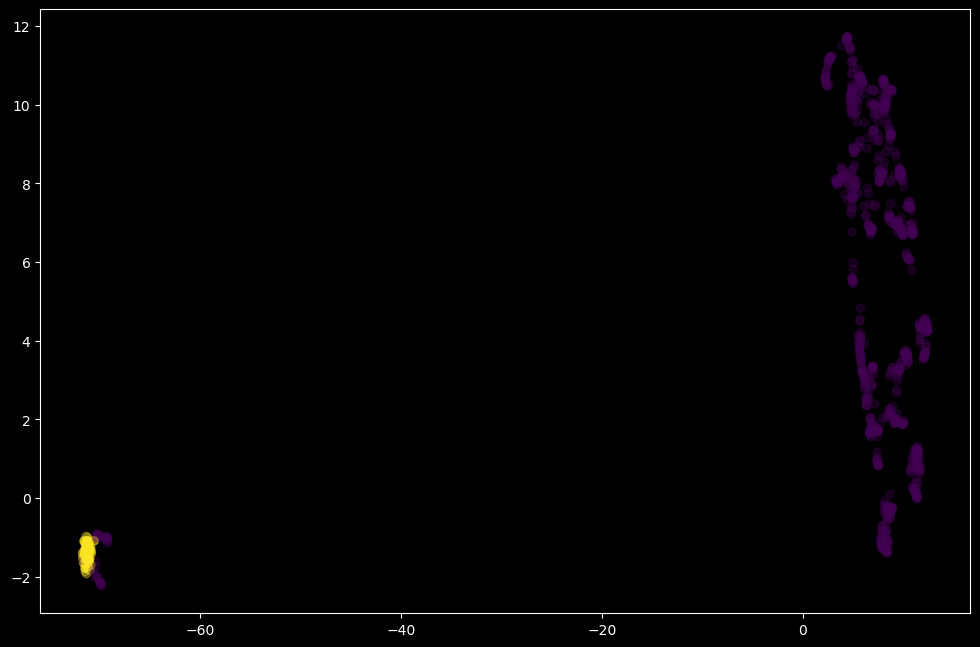

In [72]:
color_zeros = [ 0 if np.sum(feature_vec2.iloc[i,1:]) > 0 else 1 for i in range(feature_vec.shape[0])]
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding2[:, 0], embedding2[:, 1], c=color_zeros, alpha=0.3)
plt.show()

# Risk Factors

# Procedural

In [44]:
lab_df = pd.read_sql(sql="select * from Dflt._B00_ML4TrgPos_Y201621_04_04_Lab t", con=conn)

In [ ]:
display(lab_df)

In [ ]:
lab_df.loc[lab_df['LabChemTestName'].str.contains("neur", case=False)]

In [48]:
lab_df.loc[lab_df['LabChemTestName'].str.contains("MRI", case=False)]

,PatientSSN,LabChemSpecimenDateTime,LabChemResultValue,LabChemResultNumericValue,Abnormal,LabChemTestName,RequestLocation,LOINC,LabChemSID,Sta3n,LabChemTestSID,PatientSID


In [52]:
lab_df.loc[lab_df['LOINC'].str.contains("6406", case=False)]
# LOINC of MRI = LP6406-5?

,PatientSSN,LabChemSpecimenDateTime,LabChemResultValue,LabChemResultNumericValue,Abnormal,LabChemTestName,RequestLocation,LOINC,LabChemSID,Sta3n,LabChemTestSID,PatientSID


In [51]:
lab_df.loc[lab_df['LabChemTestName'].str.contains("imaging", case=False)]

,PatientSSN,LabChemSpecimenDateTime,LabChemResultValue,LabChemResultNumericValue,Abnormal,LabChemTestName,RequestLocation,LOINC,LabChemSID,Sta3n,LabChemTestSID,PatientSID


In [55]:
lab_df.loc[lab_df['LabChemTestName'].str.contains("img", case=False)]

,PatientSSN,LabChemSpecimenDateTime,LabChemResultValue,LabChemResultNumericValue,Abnormal,LabChemTestName,RequestLocation,LOINC,LabChemSID,Sta3n,LabChemTestSID,PatientSID


In [53]:
lab_df.loc[lab_df['LabChemTestName'].str.contains("radiology", case=False)]

,PatientSSN,LabChemSpecimenDateTime,LabChemResultValue,LabChemResultNumericValue,Abnormal,LabChemTestName,RequestLocation,LOINC,LabChemSID,Sta3n,LabChemTestSID,PatientSID


In [56]:
consult_df = pd.read_sql(sql="select * from Dflt._B00_ML4TrgPos_Y201621_08_Consult t", con=conn)

In [ ]:
display(consult_df)

In [ ]:
consult_df.loc[consult_df['ToRequestServiceName'].str.contains("neur", case=False)]

In [59]:
temp1 = consult_df.loc[consult_df['ToRequestServiceName'].str.contains("neur", case=False)].ToRequestServiceName.unique()
print(len(temp1))

array(['NEUROLOGY OUTPATIENT', 'Neurology Inpt',
       'Neuropsychological Assessment Outpt',
       'NEUROLOGY GENERAL OUTPT (SAC)', 'NEUROLOGY HEADACHE OUTPT',
       'NEUROLOGY ED OUTPT CONSULT', 'NEUROLOGY INPT', 'NEUROLOGY OUTPT',
       'NEUROSURGERY IN/OUT PT (OLD) OUTPT', 'NEUROLOGY ECONSULT OUTPT',
       'P NEUROSURGERY-ECONSULT REVIEW IFC (PORTLAND)',
       'E-CONSULT NEUROSURGERY OUTPT', 'E-CONSULT NEUROLOGY OUTPT',
       'NEUROPSYCHOLOGY OUTPATIENT', 'Neurology E-Consult Outpt',
       'Formulary Exception - Neurology Outpt PADR',
       'COGNITIVE DISORDERS - NEUROPSYCHOLOGICAL TESTING OUTPT',
       'NEUROSURGERY CLINIC OUTPT', 'NEUROSURGERY INPT',
       'NEUROLOGY INPT (GENERAL)',
       'CO-BH NEUROPSYCHOLOGICAL TESTING OUTPATIENT-589A4',
       'IC/NEUROLOGY OUTPT-636A8', 'EMG/NCV NEUROLOGY OUTPT OR INPAT',
       'NEURODIAGNOSTICS OUTPATIENT', 'NEUROLOGY OUTPATIENT JC',
       'NEUROPSYCHOLOGICAL OUTPT TESTING JB',
       'NEUROLOGY (INPATIENT) CONSULT', 'NEUROLO

In [49]:
temp1 = dataset["Consult"].loc[dataset["Consult"]['ToRequestServiceName'].str.contains("neur", case=False)].ConStopCodeName.unique()
display(temp1)

array(['NEUROLOGY', 'PSYCHOLOGICAL TESTING',
       'TBI (TRAUMATIC BRAIN INJURY)', 'NEUROSURGERY', 'CHART CONSULT',
       'CLINICAL PHARMACY', 'PSYCHOLOGY', 'SLEEP MEDICINE', 'EEG',
       'EMG - ELECTROMYOGRAM', 'DEMENTIA CLINIC', 'PM&RS PHYSICIAN',
       'MENTAL HEALTH CLINIC - IND', 'NURSE PRACTITIONER',
       'EPILEPSY ECOE', 'POLYTRAUMA/TBI IND', 'ALS CENTER',
       'COMMUNITY CARE CONSULT', 'TELEPHONE/NEUROLOGY',
       'SPINAL CORD INJURY', 'EVOKED POTENTIAL', 'PAIN CLINIC',
       'ADMIN PAT ACTIVTIES (MASNONCT)', 'POST SURG RTINE AFTRCARE 2ND',
       'PM&RS AMP CLINIC', 'TELEPHONE/SURGERY', 'TELEPHONE/MEDICINE',
       'TELEPHONE MH', 'EMERGENCY DEPT', 'MH INTGRTD CARE IND',
       'ORTHO/JOINT SURG', 'MH INTERVNTION BIOMED CARE IND',
       'RT CLIN VD TH PRV SITE(DIFSTA)', 'SPINAL SURG', None,
       'RT CLIN VID CARE HOME', 'MULTIPLE SCLEROSIS (MS)',
       'PADRECC PARKINSONS', 'PSYCHIATRY', 'PHYSICAL THERAPY',
       'MENTAL HEALTH CONSULTATION', 'FELLOW/RESIDENT',


In [ ]:
temp2 = consult_df.loc[consult_df['ConStopCode'] == 315.0]
display(temp2)
print(len(temp2.ToRequestServiceName.unique()))

In [ ]:
rad_df = pd.read_sql(sql="select * from Dflt._B00_ML4TrgPos_Y201621_05_04_Rad t", con=conn)
display(rad_df)

In [ ]:
rad_df.loc[rad_df['CPTName'].str.contains("mri", case=False, na=False)]

In [ ]:
rad_df.loc[rad_df['CPTName'].str.contains("magn", case=False, na=False)]

In [ ]:
rad_df.loc[rad_df['CPTName'].str.contains(" ct ", case=False, na=False)]

In [ ]:
rad_df.loc[rad_df['CPTName'].str.contains(" ct", case=False, na=False)]

In [81]:
rad_df.loc[rad_df['CPTName'].str.contains("tomography", case=False, na=False)]

,PatientSSN,ExamDateTime,CPTCode,CPTName,RadiologyDiagnosticCode,RadiologyExamSID,Sta3n,PatientSID,RadiologyProcedureSID


In [ ]:
# what are these...
rad_df.loc[rad_df['CPTName'].str.contains("akjsdhfadkfabj", case=False, na=True)]